# Cat or dog neural network recognition

## Loading images and resizing the data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle 
%matplotlib inline

In [23]:
datadir = r"./cats_or_dogs_dataset/"
categories = ["Dog","Cat"]
training_data  = []
IMG_SIZE = 100

In [ ]:
def create_training_data():
    """
    This function loops through the set of pictures for each category (dog or cat), reads it in gray scale and resize it to
    have an homogeneus set of images to analyze (of 100p x 100p)
    """
    for category in categories:
        path = os.path.join(datadir, category) # path for dogs or cats
        class_num = categories.index(category) # 1 is cats, 0 dogs for last run at least
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:
# Showing an example
plt.imshow(training_data[1][0])
plt.show()

In [ ]:
# to cross check the label has been correctly assigned ( 1 cats, 0 dogs)
print(training_data[1][1])

In [ ]:
#Randomly shuffling the data is important to not create wrong patterns recognition in the NN 
random.shuffle(training_data)

In [ ]:
X = []
y = []

# We construct the features matrix X and the label vector y based on the training data, which consists of a 2D Lists
# (features, label)
for features, label in training_data:
    X.append(features)
    y.append(label)
    
""" 
Reshaping the features Matrix, as we cannot pass a list of features. Instead, we have to pass a tensor
(or array in numpy terms) with (n, 100, 100, 1) dimensions, where n is the number of pictures.

"""
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
"""
This usage of pickle is to store the data so we don't have to be loading it each time we run anything on this modeling.
This fasten then processing of data and also assures us that the data is always loaded each time the same way 
(same order and so on)
"""
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [8]:
pickle_in_X = open("X.pickle", "rb")
pickle_in_y = open("y.pickle", "rb")
X = pickle.load(pickle_in_X)
y = pickle.load(pickle_in_y)

# Training the model

In [52]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoardoard
import time

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
# because tf 2.0 is so special that it needs y to be an array too
y_train = np.array(y_train)
y_test = np.array(y_test)

In [73]:
#Normalize the dataset allows us to work in the [0,1] domain, which is easier for the NN.
X_train = tf.keras.utils.normalize(X_train, axis= 1)
X_test = tf.keras.utils.normalize(X_test, axis= 1)

model_name = "cats-vs-dogs-64-64-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(model_name))

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics= ['accuracy']
             )

model.fit(X_train, y_train, batch_size=32, epochs=5, callbacks = [tensorboard])

Epoch 1/5
546/546 [==============================] - 326s 597ms/step - loss: 0.6359 - accuracy: 0.6358
Epoch 2/5
546/546 [==============================] - 326s 597ms/step - loss: 0.5267 - accuracy: 0.7414
Epoch 3/5
546/546 [==============================] - 292s 535ms/step - loss: 0.4645 - accuracy: 0.7818
Epoch 4/5
546/546 [==============================] - 348s 637ms/step - loss: 0.4238 - accuracy: 0.8030
Epoch 5/5
546/546 [==============================] - 300s 550ms/step - loss: 0.3802 - accuracy: 0.8295


In [74]:
val_loss, val_acc = model.evaluate(X_test, y_test)

print(val_loss, val_acc)

234/234 [==============================] - 41s 175ms/step - loss: 0.5224 - accuracy: 0.7626
0.5224489569664001 0.7625601291656494


In [75]:
model.save(r'cats_and_dogs_model')

In [76]:
new_model = tf.keras.models.load_model('cats_and_dogs_model')

In [ ]:
predictions = new_model.predict([X_test])

In [ ]:
print(X_test[1].shape)

In [ ]:
print(np.argmax(predictions[5000]))

In [ ]:
X_aux = X_test[5000][0:100,0:100,0]
print(X_aux.shape)

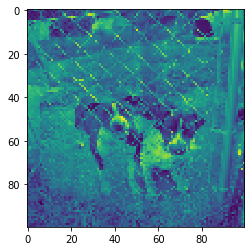

In [65]:
plt.imshow(X_aux)
plt.show()

In [66]:
mi_perro = cv2.imread("./cats_or_dogs_dataset/my_dog.jpeg", cv2.IMREAD_GRAYSCALE)
mi_perro_next = cv2.resize(mi_perro, (IMG_SIZE,IMG_SIZE))

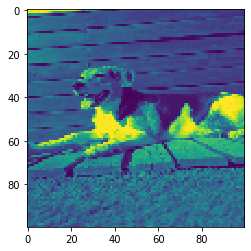

In [67]:
plt.imshow(mi_perro_next)
plt.show()

In [68]:
mi_perro_arr = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
prediction_my_dog = new_model.predict([mi_perro_arr])

In [69]:
print(np.argmax(prediction_my_dog[0]))

1
